In [53]:
import pickle
import os
import matplotlib.pyplot as plt
import csv
import numpy as np
import pandas as pd
from models.ecoli.analysis import cohortAnalysisPlot
from wholecell.analysis.analysis_tools import (exportFigure,
	read_bulk_molecule_counts, read_stacked_bulk_molecules,read_stacked_columns)
from wholecell.io.tablereader import TableReader
from wholecell.utils.protein_counts import get_simulated_validation_counts
import plotly.graph_objects as go

In [54]:
# INPUTS

# sim 1 name (x axis): 
sim_x = "CLNE1"
sim_x_path = f"/Users/miagrahn/wcEcoli/out/{sim_x}/wildtype_000000/cohort_average_monomer_count_data/unfiltered_data/log_data/LogAvgProteinCounts_startGen_2.csv"
sim_x_data = pd.read_csv(sim_x_path)

# sim 2 name (y axis):
sim_y = "CL_5hr"
sim_y_path = f"/Users/miagrahn/wcEcoli/out/{sim_y}/wildtype_000000/cohort_average_monomer_count_data/unfiltered_data/log_data/LogAvgProteinCounts_startGen_2.csv"
sim_y_data = pd.read_csv(sim_y_path)

sim_x_data
print(sim_x_data.columns)

Index(['Monomer ID', 'Log10 Average Monomer Counts'], dtype='object')


FUNCTIONS

In [55]:
def generate_comparison_plotly(sim_x,sim_y,sim_x_data, sim_y_data):
		fig = go.Figure()
		
		x = sim_x_data["Log10 Average Monomer Counts"]
		y = sim_y_data["Log10 Average Monomer Counts"]
		
		# have the monomer IDs be the overlap text


		hovertext = sim_x_data["Monomer ID"]
		
		
		#hovertext = sim_x_data.apply(lambda row: f"Common Name: {row['gene symbol']}<br>HL Value: {row['HL value']}<br>HL Source: {row['HL source']}", axis=1)
		 
		# Add scatter trace
		fig.add_trace(
			go.Scatter(x=x, y=y, hovertext=hovertext, mode='markers', name="Counts", marker=dict(size=5, color='lightseagreen', opacity=0.5)))

		# Compute linear trendline
		z = np.polyfit(x, y, 1)
		p = np.poly1d(z)
		trendline_y = p(x)



		# Add trendline trace
		fig.add_trace(
			go.Scatter(x=x, y=trendline_y, mode='lines',
					   name=f'Linear fit: {p}',
					   line=dict(color='orange')))
		

		# Update layout
		fig.update_traces(marker_size=3)
		fig.update_layout(
			title=f"Simulation Protein Counts Comparison: \n {sim_y} "
				  f"vs. {sim_x}",
			xaxis_title=f"log10({sim_x} Protein Counts)",
			yaxis_title=f"log10({sim_y} Protein Counts)",
			autosize=False, width=900, height=900,)  
		fig.update_layout(
    		autosize=False,
    		width=800,          # Set width
    		height=800,         # Set height
    		xaxis=dict(
        		scaleanchor="y",  # Lock x-axis scale to y-axis
        		constrain="domain"  # Prevent stretching
    		),
    		yaxis=dict(
        		constrain="domain"  # Prevent stretching
    		))
		

		# add a y=x line
		fig.add_trace(
			go.Scatter(x=[0, 6], y=[0, 6], mode="lines",
					line=go.scatter.Line(color="black", dash="dash"),
					opacity=0.2, name="y=x"));

		# save the figure as an html:
		plt_out = "/Users/miagrahn/wcEcoli/models/ecoli/analysis/local_notebooks/protein_count_comparisons/protein_count_comparison_plotly_outputs/"
		plot_name = f"proteinCountsComparison_cohortPlot_{sim_y}_vs_{sim_x}_plotly.html"
		fig.write_html(os.path.join(plt_out, plot_name))

generate_comparison_plotly(sim_x,sim_y,sim_x_data, sim_y_data)
		

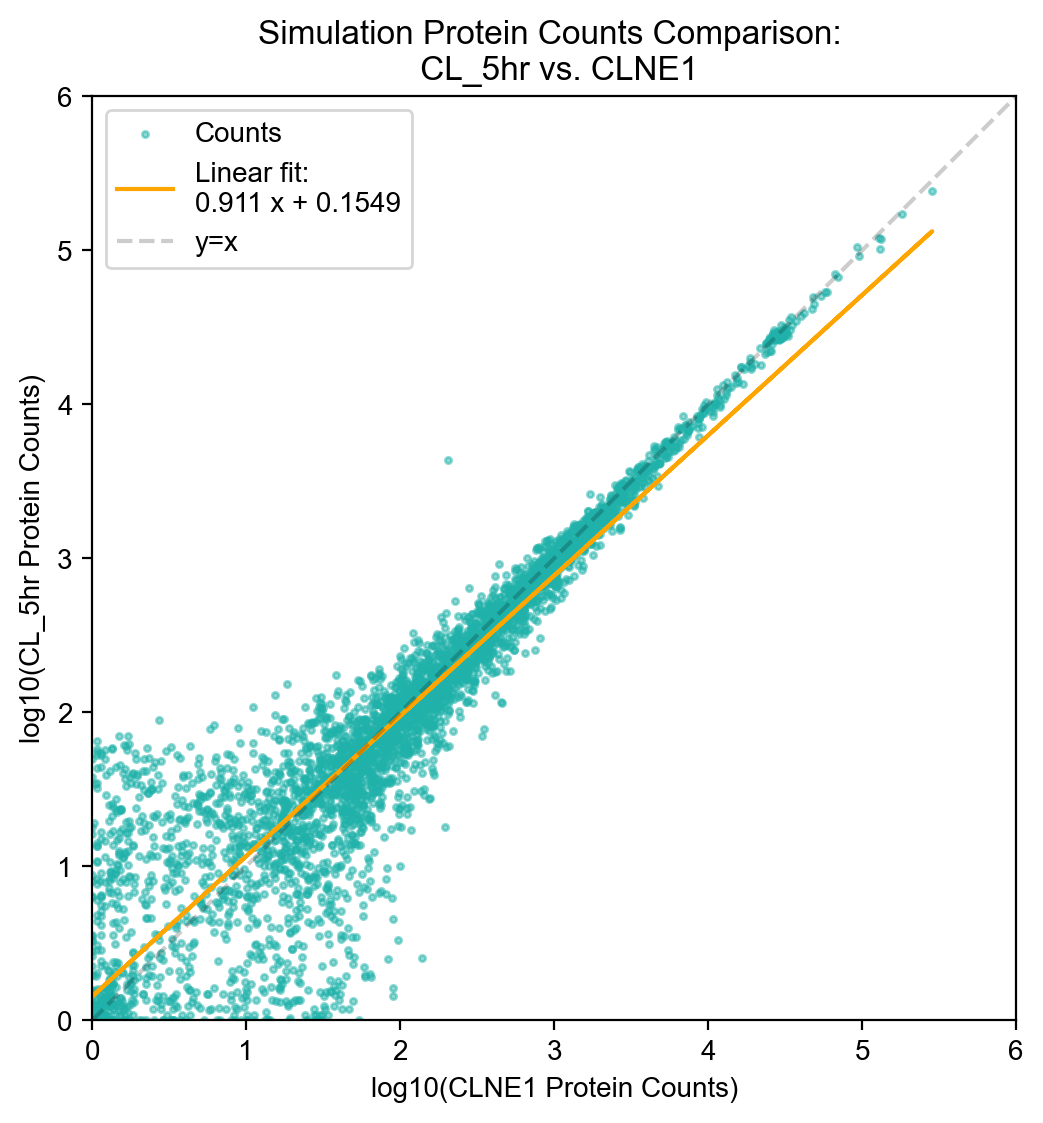

In [56]:
def generate_validation_plot(sim_x,sim_y,sim_x_data, sim_y_data):
		plt.figure(figsize=(8, 6), dpi=200)

		# Compute log10 values
		x = sim_x_data["Log10 Average Monomer Counts"]
		y = sim_y_data["Log10 Average Monomer Counts"]

		# Add scatter trace
		plt.scatter(x=x, y=y, s=5, label="Counts", alpha=0.5, color='lightseagreen')

		# Compute linear trendline
		z = np.polyfit(x, y, 1)
		p = np.poly1d(z)
		trendline_y = p(x)

		


		# Add trendline trace
		plt.plot(x, trendline_y,
					   label=f'Linear fit: {p}',
					   color='orange')
		
		# add a y=x line
		plt.plot([0, 6], [0, 6],
				color="black", linestyle="dashed",
				 alpha=0.2, label="y=x");

		# Update layout

		plt.title(f"Simulation Protein Counts Comparison: \n {sim_y} "
				  f"vs. {sim_x}")
		plt.xlabel(f"log10({sim_x} Protein Counts)")
		plt.ylabel(f"log10({sim_y} Protein Counts)")
		plt.xlim(0, 6)
		plt.ylim(0, 6)
		plt.gca().set_aspect('equal', adjustable='box')

		plt.legend()



		# save the figure as an pdf:
		plt_out = "/Users/miagrahn/wcEcoli/models/ecoli/analysis/local_notebooks/protein_count_comparisons/protein_count_comparison_matplotlib_outputs/"
		plot_name = f"proteinCountsComparison_cohortPlot_{sim_y}_vs_{sim_x}_matplotlib.pdf"
		plt.savefig(os.path.join(plt_out, plot_name))
		
generate_validation_plot(sim_x,sim_y,sim_x_data, sim_y_data)